<a href="https://colab.research.google.com/github/sanjayc2/MNIST-w-SVM---High-Accuracy/blob/main/MNIST_with_SVM_Classifier_using_Data_Augmentation_high_test_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
X, y = mnist["data"], mnist["target"]
import numpy as np
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

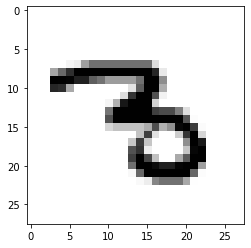

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[30]
plt.imshow(some_digit.values.reshape(28,28), cmap='binary')


In [13]:
# try SVM classifier with rbf kernel
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier

n_estimators = 10
y_train_5 = (y_train == 5)
svm_clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='poly'), max_samples=1.0 / n_estimators, n_estimators=n_estimators), n_jobs=-1)
svm_clf = svm_clf.fit(X_train, y_train_5)

In [14]:
 y_scores = cross_val_predict(svm_clf, X_train,y_train_5, cv=3, method = "decision_function", n_jobs = -1)


# New Section

# New Section

[ 1.00938488 -2.05981054 -1.11851485 ...  0.84986558 -1.05971648
 -1.23053881]


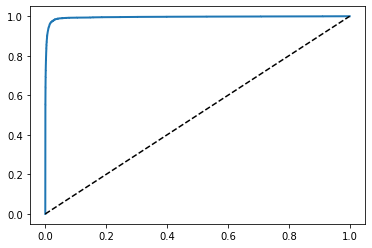

In [15]:
print(y_scores)
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, linewidth=2, label="roc_curve")
  plt.plot([0,1], [0,1], "k--")
  [...]

plot_roc_curve(fpr, tpr)

In [16]:
y_train_pred = cross_val_predict(svm_clf, X_train, y_train_5, cv=3, n_jobs=-1)


In [17]:
print(confusion_matrix(y_train_5, y_train_pred))

[[54448   131]
 [ 1128  4293]]


In [18]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier

n_estimators = 10
svm_clf = BaggingClassifier(SVC(kernel='poly'), max_samples=1.0 / n_estimators, n_estimators=n_estimators)
svm_clf = svm_clf.fit(X_train, y_train)
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

In [19]:
conf_mtrx = confusion_matrix(y_train, y_train_pred)

In [20]:
row_sums = conf_mtrx.sum(axis=1, keepdims=True)

In [21]:
norm_conf_mtrx = conf_mtrx/row_sums

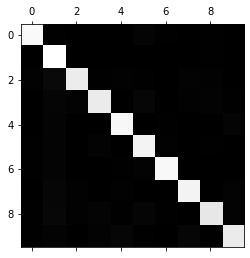

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

np.fill_diagonal(conf_mtrx, 0.)
plt.matshow(norm_conf_mtrx, cmap=plt.cm.gray)
plt.show()

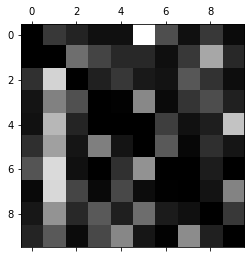

In [23]:
row_sums = conf_mtrx.sum(axis=1, keepdims=True)
norm_conf_mtrx = conf_mtrx/row_sums
np.fill_diagonal(norm_conf_mtrx, 0.)
plt.matshow(norm_conf_mtrx, cmap=plt.cm.gray)
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing   import MinMaxScaler

X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [25]:
from sklearn.svm import SVC
 
svm_clf_rbf = SVC(kernel='rbf').fit(X_train, y_train)

In [26]:
y_train_pred_rbf = cross_val_predict(svm_clf_rbf, X_train, y_train, cv=3, n_jobs =-1)
conf_mtrx_rbf = confusion_matrix(y_train, y_train_pred_rbf)
print(conf_mtrx_rbf)

[[5863    3   10    2    4    8   14    2   13    4]
 [   1 6664   26    9   10    1    3   10   10    8]
 [  19    9 5811   16   26    5    8   30   28    6]
 [   3    9   54 5891    2   62    1   30   61   18]
 [   5   11   13    0 5712    0   20    9    4   68]
 [  11    6   10   57   14 5255   35    4   17   12]
 [  20    8    7    0   10   32 5831    0   10    0]
 [   5   21   42    6   35    2    1 6100    7   46]
 [   8   30   19   38   20   39   21    9 5645   22]
 [  14   11    4   31   72   16    2   59   19 5721]]


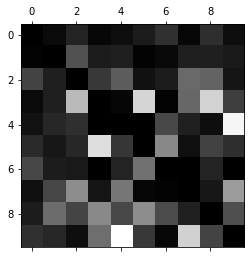

In [27]:
row_sums = conf_mtrx_rbf.sum(axis=1, keepdims=True)
norm_conf_mtrx = conf_mtrx_rbf/row_sums
np.fill_diagonal(norm_conf_mtrx, 0.)
plt.matshow(norm_conf_mtrx, cmap=plt.cm.gray)
plt.show()

In [28]:
svm_clf_poly = SVC(kernel='poly').fit(X_train, y_train)

In [29]:
y_train_pred_poly = cross_val_predict(svm_clf_poly, X_train, y_train, cv=3, n_jobs =-1)
conf_mtrx_poly = confusion_matrix(y_train, y_train_pred_poly)
print(conf_mtrx_poly)

[[5827    1   16    3    4   29   16    7   10   10]
 [   1 6663   20    8   12    0    2    9   24    3]
 [  24   27 5787   13   18   10   10   39   25    5]
 [   6   22   54 5865    4   62    1   36   57   24]
 [   7   29   11    0 5692    1   18   10   12   62]
 [  10   11    8   43    6 5266   34    4   25   14]
 [  19   11    3    1   12   44 5817    0   11    0]
 [   5   40   32    3   28    4    0 6103    9   41]
 [  13   41   22   42   19   52   18    8 5613   23]
 [  22   21    6   31   73   20    2   58   19 5697]]


[[5827    1   16    3    4   29   16    7   10   10]
 [   1 6663   20    8   12    0    2    9   24    3]
 [  24   27 5787   13   18   10   10   39   25    5]
 [   6   22   54 5865    4   62    1   36   57   24]
 [   7   29   11    0 5692    1   18   10   12   62]
 [  10   11    8   43    6 5266   34    4   25   14]
 [  19   11    3    1   12   44 5817    0   11    0]
 [   5   40   32    3   28    4    0 6103    9   41]
 [  13   41   22   42   19   52   18    8 5613   23]
 [  22   21    6   31   73   20    2   58   19 5697]]


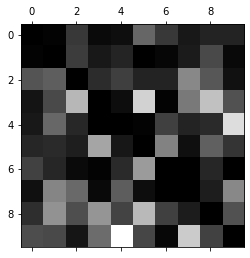

In [30]:
print(conf_mtrx_poly)
row_sums = conf_mtrx_poly.sum(axis=1, keepdims=True)
norm_conf_mtrx = conf_mtrx_poly/row_sums
np.fill_diagonal(norm_conf_mtrx, 0.)
plt.matshow(norm_conf_mtrx, cmap=plt.cm.gray)
plt.show()

In [31]:
from scipy import ndimage

def image_with_shifts(some_image, dx, dy):
  image = some_image.reshape(28,28)
  return ndimage.shift(image, [dx,dy], cval=0, mode="constant").reshape([-1])

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1,0), (0,1), (-1,0), (0,-1)):
    for image, label in zip(X_train, y_train):
      X_train_augmented.append(image_with_shifts(image,dx,dy))
      y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

print(X_train_augmented.shape)

(300000, 784)


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from scipy import ndimage

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

def image_with_shifts(some_image, dx, dy):
  image = some_image.reshape(28,28)
  return ndimage.shift(image, [dx,dy], cval=0, mode="constant").reshape([-1])

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1,0), (0,1), (-1,0), (0,-1)):
    for image, label in zip(X_train, y_train):
      X_train_augmented.append(image_with_shifts(image,dx,dy))
      y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

n_estimators = 10
svm_clf_rbf_aug = BaggingClassifier(SVC(kernel='rbf', class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators)
svm_clf_rbf_aug = svm_clf_rbf_aug.fit(X_train_augmented, y_train_augmented)

In [ ]:
#y_train_pred_rbf_aug = cross_val_predict(svm_clf_rbf_aug, X_train, y_train, cv=3, n_jobs =-1)
#conf_mtrx_rbf = confusion_matrix(y_train_augmented, y_train_pred_rbf_aug)
#print(conf_mtrx_rbf_aug)
y_pred = svm_clf_rbf_aug.predict(X_test)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9762


[[ 972    0    0    0    0    3    2    1    2    0]
 [   0 1130    3    1    0    1    0    0    0    0]
 [   6    0 1007    4    1    0    2    6    6    0]
 [   0    0    3  991    0    1    0    8    6    1]
 [   1    0    3    0  954    0    4    0    2   18]
 [   2    1    0   10    2  867    4    1    3    2]
 [   8    2    0    0    2    4  940    0    2    0]
 [   0   10   11    2    2    0    0  990    1   12]
 [   4    0    1    4    6    6    3    3  945    2]
 [   5    5    1    8   10    3    0    6    5  966]]


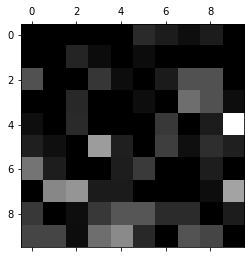

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt

conf_mtrx_rbf = confusion_matrix(y_test, y_pred)
print(conf_mtrx_rbf)
row_sums = conf_mtrx_rbf.sum(axis=1, keepdims=True)
norm_conf_mtrx = conf_mtrx_rbf/row_sums
np.fill_diagonal(norm_conf_mtrx, 0.)
plt.matshow(norm_conf_mtrx, cmap=plt.cm.gray)
plt.show()